In [ ]:
pip install torch

In [ ]:
pip install torch-summary

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms

In [ ]:
class CNN_q1(nn.Module) :

  def __init__(self,in_channels=3,num_classes=10) :
    super(CNN_q1,self).__init__()
    zero_pad_model = nn.ZeroPad2d(2)

    self.conv1 = nn.Conv2d(in_channels=3,out_channels=8,kernel_size =(3,3),stride = (1,1), padding = (1,1))  # 32*32*3 
    self.pool = nn.MaxPool2d(kernel_size=(2,2),stride = (2,2))  # 32*32*8 --> 16*16*8
    self.fc1 = nn.Linear(16*16*8,num_classes)

  def forward(self,x) :

    x = F.relu(self.conv1(x))
    x = self.pool(x)
    x = x.reshape(x.shape[0],-1)
    x = self.fc1(x)
    return x
  


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device = torch.device(device)

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [ ]:
train_data = datasets.CIFAR10(root = './',train = True , download = True,transform = transform)

train_data_set_loader = torch.utils.data.DataLoader(train_data,batch_size = 4,shuffle = True)

test_data = datasets.CIFAR10(root = './',train = True,download = True,transform = transform)

test_data_set_loader = torch.utils.data.DataLoader(test_data,batch_size = 4,shuffle = False)


Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified


In [ ]:
model1 = CNN_q1()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model1.parameters(),lr = 0.001,momentum = 0.9)

In [ ]:
for epoch in range(20) :
  running_loss = 0.0

  for i,data in enumerate(train_data_set_loader,0) :
    inputs,labels = data
    optimizer.zero_grad()

    outputs = model1(inputs)
    loss = criterion(outputs,labels)
    loss.backward()

    optimizer.step()

    running_loss = running_loss + loss.item()

  
  print("epoch ",epoch," completed")
  print("running loss ",running_loss)



epoch  0  completed
running loss  13402.911625879817
epoch  1  completed
running loss  13340.27296638675
epoch  2  completed
running loss  13268.606498586014
epoch  3  completed
running loss  13254.581389646046
epoch  4  completed
running loss  13177.060269351117
epoch  5  completed
running loss  13165.257006592117
epoch  6  completed
running loss  13167.88613080699
epoch  7  completed
running loss  13119.650418296456
epoch  8  completed
running loss  13092.480690465774
epoch  9  completed
running loss  13025.282664526254
epoch  10  completed
running loss  13066.947278541513
epoch  11  completed
running loss  12996.272980248556
epoch  12  completed
running loss  13020.565811891574
epoch  13  completed
running loss  12996.781726679765
epoch  14  completed
running loss  12974.739227471873
epoch  15  completed
running loss  12979.66674705688
epoch  16  completed
running loss  12940.374253545888
epoch  17  completed
running loss  12903.215945558622
epoch  18  completed
running loss  12948.

In [ ]:
correct = 0
total = 0

with torch.no_grad() :
  for data in test_data_set_loader :
    images,labels = data
    outputs = model1(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
  
acc = correct / total
print("Accuracy is ",str(acc))

#2 epcohs 59.62
#10 epochs 64.26
#20 epochs 68.31

Accuracy is  0.68314


In [ ]:
class CNN_q2(nn.Module) :

  def __init__(self,in_channels=3,num_classes=10) :
    super(CNN_q2,self).__init__()
    zero_pad_model = nn.ZeroPad2d(2)

    self.conv1 = nn.Conv2d(in_channels=3,out_channels=16,kernel_size =(3,3),stride = (1,1), padding = (1,1))
    self.batch_norm1 = nn.BatchNorm2d(16)  
    self.pool = nn.MaxPool2d(kernel_size=(2,2),stride = (2,2))
    self.fc1 = nn.Linear(16*16*16,32)
    self.fc2 = nn.Linear(32,num_classes)

  def forward(self,x) :

    x = F.relu(self.conv1(x))
    x = self.batch_norm1(x)
    x = self.pool(x)
    x = x.reshape(x.shape[0],-1)

    x = self.fc1(x)
    x = self.fc2(x)
    return x

In [ ]:
model2 = CNN_q2()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model2.parameters(),lr = 0.001,momentum = 0.9)

In [ ]:
for epoch in range(20) :
  running_loss = 0.0

  for i,data in enumerate(train_data_set_loader,0) :
    inputs,labels = data
    optimizer.zero_grad()

    outputs = model2(inputs)
    loss = criterion(outputs,labels)
    loss.backward()

    optimizer.step()

    running_loss = running_loss + loss.item()

  
  print("epoch ",epoch," completed")
  print("running loss ",running_loss)


epoch  0  completed
running loss  17917.479144260287
epoch  1  completed
running loss  14896.642614223063
epoch  2  completed
running loss  13863.954897515476
epoch  3  completed
running loss  13273.880529550835
epoch  4  completed
running loss  12874.589469339699
epoch  5  completed
running loss  12593.925108211115
epoch  6  completed
running loss  12386.215701831505
epoch  7  completed
running loss  12158.800939270062
epoch  8  completed
running loss  11997.675145900808
epoch  9  completed
running loss  11841.561648525298
epoch  10  completed
running loss  11750.910693798214
epoch  11  completed
running loss  11659.523064755835
epoch  12  completed
running loss  11517.876153254882
epoch  13  completed
running loss  11410.571806181222
epoch  14  completed
running loss  11330.431773583405
epoch  15  completed
running loss  11288.660025615245
epoch  16  completed
running loss  11216.445115009323
epoch  17  completed
running loss  11156.553594045807
epoch  18  completed
running loss  110

In [ ]:
correct = 0
total = 0

with torch.no_grad() :
  for data in test_data_set_loader :
    images,labels = data
    outputs = model2(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
  
acc = correct / total
print("Accuracy is ",str(acc))


Accuracy is  0.70538


In [ ]:
class CNN_q3(nn.Module) :

  def __init__(self,in_channels=3,num_classes=10) :
    super(CNN_q3,self).__init__()
    zero_pad_model = nn.ZeroPad2d(2)

    self.conv1 = nn.Conv2d(in_channels=3,out_channels=32,kernel_size =(3,3),stride = (1,1), padding = (1,1))
    self.batch_norm1 = nn.BatchNorm2d(32)
    self.pool1 = nn.MaxPool2d(kernel_size=(2,2),stride = (2,2))

    self.conv2 = nn.Conv2d(in_channels=32,out_channels=64,kernel_size = (3,3),stride = (1,1),padding=(1,1))
    self.batch_norm2 = nn.BatchNorm2d(64)
    self.pool2 = nn.MaxPool2d(kernel_size = (2,2),stride = (2,2))

    self.fc1 = nn.Linear(64*8*8,10)
    # self.fc2 = nn.Linear(32,num_classes)

  def forward(self,x) :

    x = F.relu(self.conv1(x))
    x = self.batch_norm1(x)
    x = self.pool1(x)

    x = F.relu(self.conv2(x))
    x = self.batch_norm2(x)
    x = self.pool2(x)

    x = x.reshape(x.shape[0],-1)

    x = self.fc1(x)
    #x = self.fc2(x)
    return x

In [ ]:
model3 = CNN_q3()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model3.parameters(),lr = 0.001,momentum = 0.9)


In [ ]:
for epoch in range(20) :
  running_loss = 0.0

  for i,data in enumerate(train_data_set_loader,0) :
    inputs,labels = data
    optimizer.zero_grad()

    outputs = model3(inputs)
    loss = criterion(outputs,labels)
    loss.backward()

    optimizer.step()

    running_loss = running_loss + loss.item()

  
  print("epoch ",epoch," completed")
  print("running loss ",running_loss)

epoch  0  completed
running loss  17709.989908747375
epoch  1  completed
running loss  12360.302731679752
epoch  2  completed
running loss  10959.472734798677
epoch  3  completed
running loss  10041.861893883906
epoch  4  completed
running loss  9361.989851734135
epoch  5  completed
running loss  8762.846056198701
epoch  6  completed
running loss  8282.261934068985
epoch  7  completed
running loss  7866.578188209038
epoch  8  completed
running loss  7524.184841294715
epoch  9  completed
running loss  7237.234814399388
epoch  10  completed
running loss  6878.238957698108
epoch  11  completed
running loss  6642.369277927268
epoch  12  completed
running loss  6439.671596005559
epoch  13  completed
running loss  6255.226777525881
epoch  14  completed
running loss  5990.628167138755
epoch  15  completed
running loss  5847.941320198966
epoch  16  completed
running loss  5665.571238666103
epoch  17  completed
running loss  5499.581945751866
epoch  18  completed
running loss  5378.901521986365

In [ ]:
correct = 0
total = 0

with torch.no_grad() :
  for data in test_data_set_loader :
    images,labels = data
    outputs = model3(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
  
acc = correct / total
print("Accuracy is ",str(acc))


Accuracy is  0.87926


In [ ]:
class CNN_q4(nn.Module) :

  def __init__(self,in_channels=3,num_classes=10) :
    super(CNN_q4,self).__init__()
    zero_pad_model = nn.ZeroPad2d(2)

    self.conv1 = nn.Conv2d(in_channels=3,out_channels=32,kernel_size =(3,3),stride = (1,1), padding = (1,1))
    self.batch_norm1 = nn.BatchNorm2d(32)
    self.pool1 = nn.MaxPool2d(kernel_size=(2,2),stride = (2,2))

    self.conv2 = nn.Conv2d(in_channels=32,out_channels=64,kernel_size = (3,3),stride = (1,1),padding=(1,1))
    self.batch_norm2 = nn.BatchNorm2d(64)
    self.pool2 = nn.MaxPool2d(kernel_size = (2,2),stride = (2,2))

    self.conv3 = nn.Conv2d(in_channels=64,out_channels=128,kernel_size=(3,3),stride = (1,1),padding = (1,1))
    self.batch_norm3 = nn.BatchNorm2d(128)
    self.pool3 = nn.MaxPool2d(kernel_size=(2,2),stride=(2,2))

    self.fc1 = nn.Linear(128*4*4,10)
    # self.fc2 = nn.Linear(32,num_classes)

  def forward(self,x) :

    x = F.relu(self.conv1(x))
    x = self.batch_norm1(x)
    x = self.pool1(x)

    x = F.relu(self.conv2(x))
    x = self.batch_norm2(x)
    x = self.pool2(x)

    x = F.relu(self.conv3(x))
    x = self.batch_norm3(x)
    x = self.pool3(x)

    x = x.reshape(x.shape[0],-1)

    x = self.fc1(x)
    #x = self.fc2(x)
    return x

In [ ]:
model4 = CNN_q4()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model4.parameters(),lr = 0.001,momentum = 0.9)

In [ ]:
epoch_list = []
acc_list = []

for epoch in range(20) :
  running_loss = 0.0

  for i,data in enumerate(train_data_set_loader,0) :
    inputs,labels = data
    optimizer.zero_grad()

    outputs = model4(inputs)
    loss = criterion(outputs,labels)
    loss.backward()

    optimizer.step()

    running_loss = running_loss + loss.item()

  
  #print("epoch ",epoch," completed")
  #print("running loss ",running_loss)
  epoch_list.append(epoch+1)
  acc_list.append(get_accuracy())

In [ ]:
def get_accuracy() :
  correct = 0
  total = 0

  with torch.no_grad() :
    for data in test_data_set_loader :
      images,labels = data
      outputs = model4(images)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
  
  acc = correct / total
  #print("Accuracy is ",str(acc))

  return acc*100

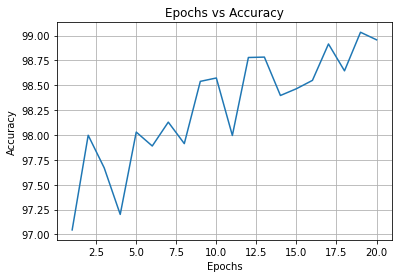

In [ ]:
import matplotlib.pyplot as plt

plt.plot(epoch_list,acc_list)
plt.title("Epochs vs Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [ ]:
# the accuracy of the model is

print(acc_list[-1])

98.958


In [ ]:
torch.save(model4,'q1-bestmodel.pt')

In [ ]:
import os 
#dir_path = os.path.dirname(os.path.realpath(__file__))
cwd = os.getcwd()

print(cwd)

/content


In [ ]:
from torchsummary import summary

summary(model4)

Layer (type:depth-idx)                   Param #
├─Conv2d: 1-1                            896
├─BatchNorm2d: 1-2                       64
├─MaxPool2d: 1-3                         --
├─Conv2d: 1-4                            18,496
├─BatchNorm2d: 1-5                       128
├─MaxPool2d: 1-6                         --
├─Conv2d: 1-7                            73,856
├─BatchNorm2d: 1-8                       256
├─MaxPool2d: 1-9                         --
├─Linear: 1-10                           20,490
Total params: 114,186
Trainable params: 114,186
Non-trainable params: 0


Layer (type:depth-idx)                   Param #
├─Conv2d: 1-1                            896
├─BatchNorm2d: 1-2                       64
├─MaxPool2d: 1-3                         --
├─Conv2d: 1-4                            18,496
├─BatchNorm2d: 1-5                       128
├─MaxPool2d: 1-6                         --
├─Conv2d: 1-7                            73,856
├─BatchNorm2d: 1-8                       256
├─MaxPool2d: 1-9                         --
├─Linear: 1-10                           20,490
Total params: 114,186
Trainable params: 114,186
Non-trainable params: 0

In [ ]:
!pwd

/content
